In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [3]:
obesity = gpd.read_file('./data/LakeCounty_Health_5114257871172773279.geojson')
print(obesity.crs)
obesity.head( )

EPSG:3435


,OBJECTID,County,Percent_1,geometry
0,1,McHenry County,27.7,"POLYGON ((883358.271 2122657.886, 888572.603 2..."
1,2,Boone County,33.7,"POLYGON ((883358.271 2122657.886, 883362.596 2..."
2,3,Ogle County,31.2,"POLYGON ((617161.942 2018203.086, 622481.577 2..."
3,4,Will County,28.0,"POLYGON ((1003871.064 1842165.938, 1003869.036..."
4,5,LaSalle County,27.1,"POLYGON ((818708.973 1807747.960, 818747.663 1..."


In [4]:
obesity.columns= ['ID', 'County', 'Obesity Percentage','geometry']

In [5]:
obesity=obesity.sort_values('Obesity Percentage', ascending= False)

In [6]:
obesity.head()

,ID,County,Obesity Percentage,geometry
13,14,Adams County,37.0,"POLYGON ((98117.828 1302709.290, 101888.882 13..."
76,77,Vermilion County,35.4,"POLYGON ((1095030.738 1391189.829, 1100168.027..."
67,68,Winnebago County,33.9,"POLYGON ((820547.342 2123579.093, 820536.259 2..."
23,24,Iroquois County,33.9,"POLYGON ((1207019.033 1583014.895, 1207035.954..."
31,32,Kendall County,33.7,"POLYGON ((910900.742 1840519.571, 915168.025 1..."


In [7]:
obesity['County']=obesity['County'].str.replace(' County', "")

In [8]:
obesity.head()

,ID,County,Obesity Percentage,geometry
13,14,Adams,37.0,"POLYGON ((98117.828 1302709.290, 101888.882 13..."
76,77,Vermilion,35.4,"POLYGON ((1095030.738 1391189.829, 1100168.027..."
67,68,Winnebago,33.9,"POLYGON ((820547.342 2123579.093, 820536.259 2..."
23,24,Iroquois,33.9,"POLYGON ((1207019.033 1583014.895, 1207035.954..."
31,32,Kendall,33.7,"POLYGON ((910900.742 1840519.571, 915168.025 1..."


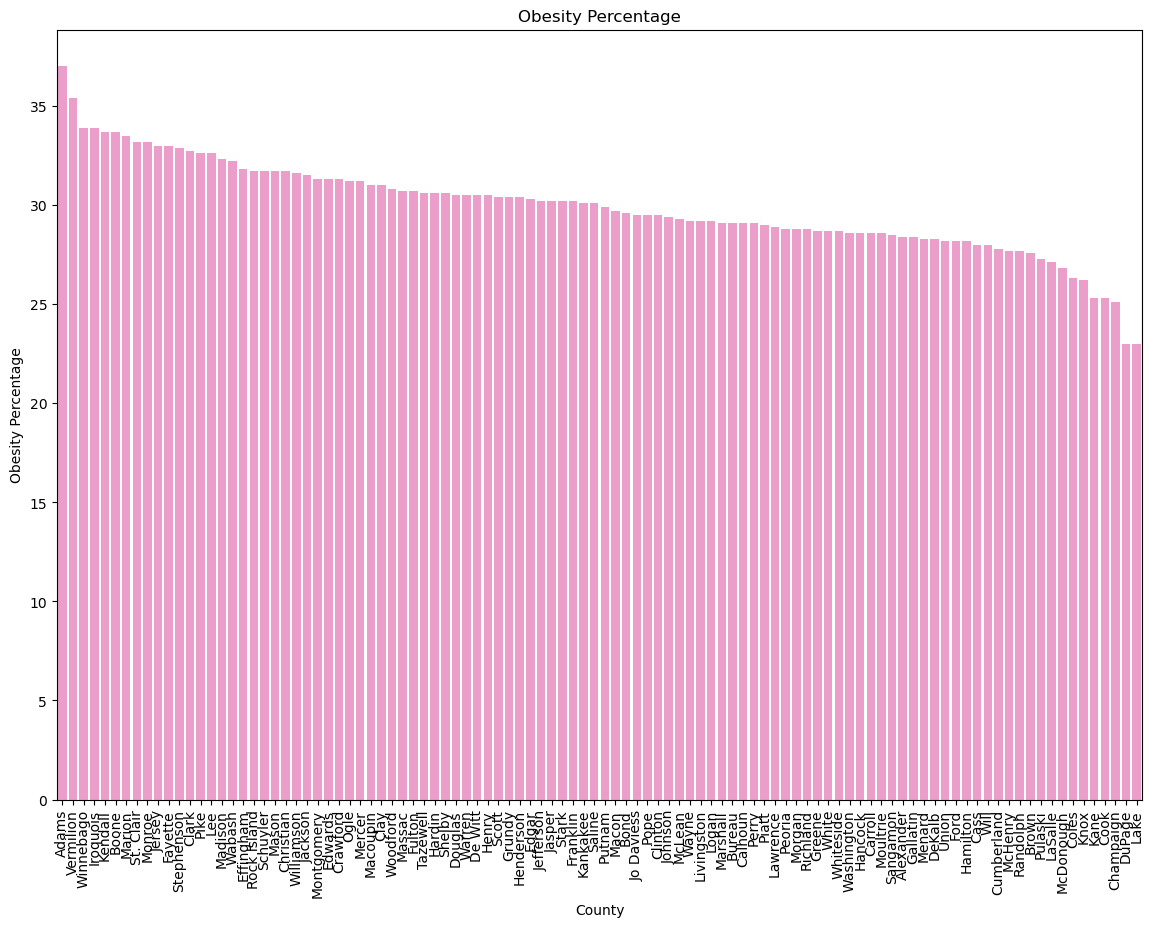

In [100]:
plt.figure(figsize=(14,10))
sns.barplot(x = 'County',y = 'Obesity Percentage',data = obesity, color='#F991CC')
plt.xlabel("County")
plt.ylabel("Obesity Percentage")
plt.title('Obesity Percentage')
plt.xticks(rotation=90)
plt.show()

In [10]:
top_10 =obesity.loc[obesity['Obesity Percentage'].isin(obesity['Obesity Percentage'].nlargest(10))]
top_10

,ID,County,Obesity Percentage,geometry
13,14,Adams,37.0,"POLYGON ((98117.828 1302709.290, 101888.882 13..."
76,77,Vermilion,35.4,"POLYGON ((1095030.738 1391189.829, 1100168.027..."
67,68,Winnebago,33.9,"POLYGON ((820547.342 2123579.093, 820536.259 2..."
23,24,Iroquois,33.9,"POLYGON ((1207019.033 1583014.895, 1207035.954..."
31,32,Kendall,33.7,"POLYGON ((910900.742 1840519.571, 915168.025 1..."
1,2,Boone,33.7,"POLYGON ((883358.271 2122657.886, 883362.596 2..."
99,100,Marion,33.5,"POLYGON ((754592.402 754639.804, 754681.868 75..."
94,95,St. Clair,33.2,"POLYGON ((591950.843 726959.001, 591917.389 72..."
96,97,Monroe,33.2,"POLYGON ((534423.635 569676.161, 532300.336 56..."
46,47,Jersey,33.0,"POLYGON ((363817.357 925362.318, 363839.313 92..."


In [11]:
bottom_10 =obesity.loc[obesity['Obesity Percentage'].isin(obesity['Obesity Percentage'].nsmallest(10))]
bottom_10

,ID,County,Obesity Percentage,geometry
60,61,Pulaski,27.3,"POLYGON ((718117.349 244726.721, 718136.451 24..."
4,5,LaSalle,27.1,"POLYGON ((818708.973 1807747.960, 818747.663 1..."
75,76,McDonough,26.8,"POLYGON ((302501.839 1455004.069, 307763.003 1..."
84,85,Coles,26.3,"POLYGON ((945073.153 1087034.086, 950621.385 1..."
18,19,Knox,26.2,"POLYGON ((529289.594 1636980.010, 529204.547 1..."
27,28,Kane,25.3,"POLYGON ((915037.370 1998683.968, 915083.058 1..."
29,30,Cook,25.3,"POLYGON ((1009945.207 1998810.714, 1015151.379..."
14,15,Champaign,25.1,"POLYGON ((948963.355 1359100.620, 954139.485 1..."
62,63,DuPage,23.0,"POLYGON ((1003445.770 1937630.451, 1008903.938..."
68,69,Lake,23.0,"POLYGON ((1020446.262 1998829.380, 1020377.830..."


In [12]:
bottom_10= bottom_10.sort_values('Obesity Percentage')
bottom_10

,ID,County,Obesity Percentage,geometry
62,63,DuPage,23.0,"POLYGON ((1003445.770 1937630.451, 1008903.938..."
68,69,Lake,23.0,"POLYGON ((1020446.262 1998829.380, 1020377.830..."
14,15,Champaign,25.1,"POLYGON ((948963.355 1359100.620, 954139.485 1..."
27,28,Kane,25.3,"POLYGON ((915037.370 1998683.968, 915083.058 1..."
29,30,Cook,25.3,"POLYGON ((1009945.207 1998810.714, 1015151.379..."
18,19,Knox,26.2,"POLYGON ((529289.594 1636980.010, 529204.547 1..."
84,85,Coles,26.3,"POLYGON ((945073.153 1087034.086, 950621.385 1..."
75,76,McDonough,26.8,"POLYGON ((302501.839 1455004.069, 307763.003 1..."
4,5,LaSalle,27.1,"POLYGON ((818708.973 1807747.960, 818747.663 1..."
60,61,Pulaski,27.3,"POLYGON ((718117.349 244726.721, 718136.451 24..."


In [13]:
bar_colors_b = {
    'DuPage' : '#F991CC',
    'Lake' : '#EEA0D5',
    'Champaign' :'#E2AFDE',
    'Kane' : '#DFB4DA',
    'Cook' : '#DBB9D6',
    'Knox' : '#D3C2CE',
    'Coles' : '#D3CACB',
    'McDonough' : '#D3D2C7',
    'LaSalle' : '#DBDAC0',
    'Pulaski' : '#E2E1B9',
} 

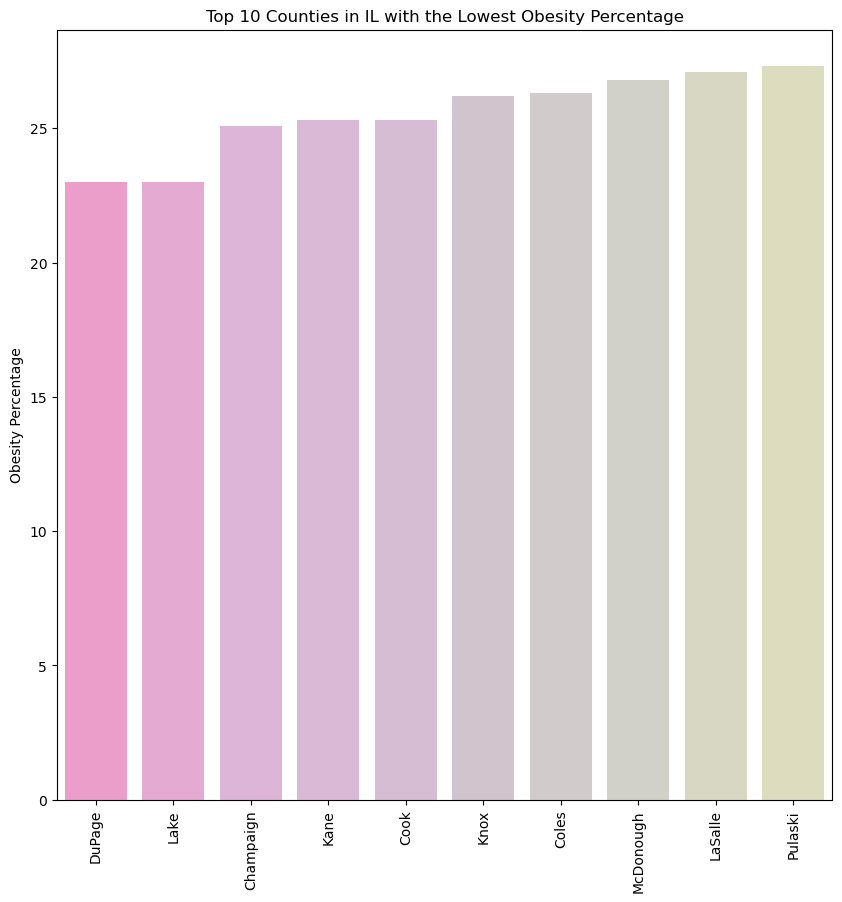

In [14]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'County',y = 'Obesity Percentage',data = bottom_10, palette= bar_colors_b)
plt.xlabel("")
plt.ylabel("Obesity Percentage")
plt.title('Top 10 Counties in IL with the Lowest Obesity Percentage')
plt.xticks(rotation=90)
plt.show()

In [15]:
bar_colors_t = {
    'Adams' : '#F991CC',
    'Vermilion' : '#EEA0D5',
    'Winnebago' :'#E2AFDE',
    'Iroquois' : '#DFB4DA',
    'Kendall' : '#DBB9D6',
    'Boone' : '#D3C2CE',
    'Marion' : '#D3CACB',
    'St. Clair' : '#D3D2C7',
    'Monroe' : '#DBDAC0',
    'Jersey' : '#E2E1B9',
    'Fayette' : '#E5E4BF'
} 

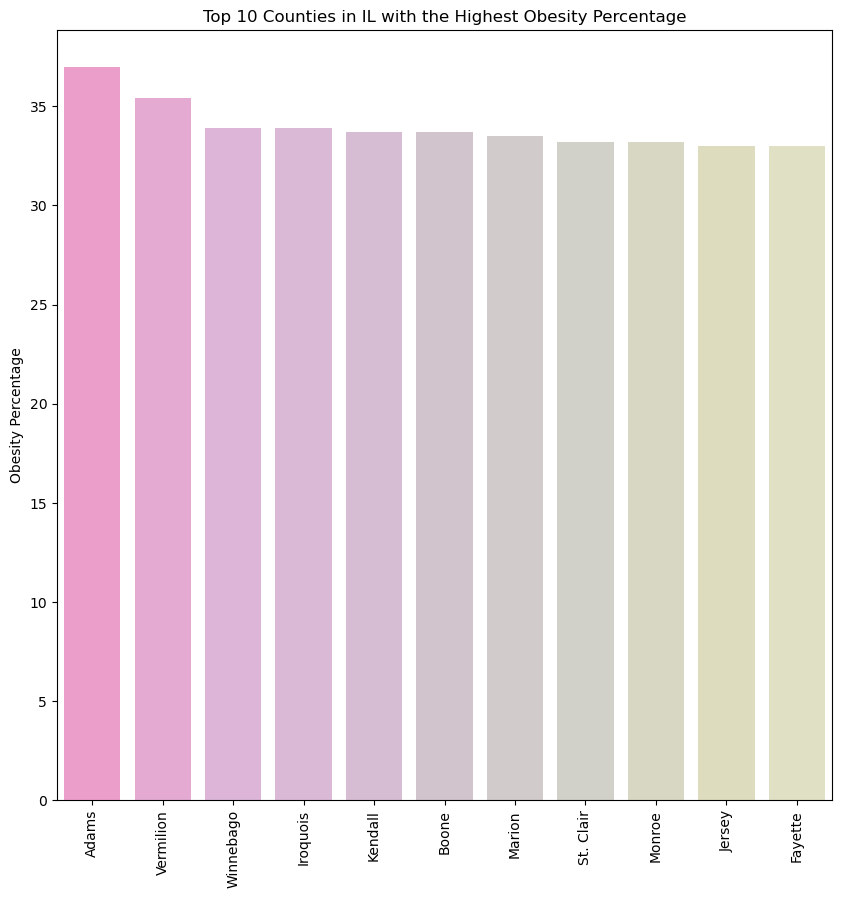

In [16]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'County',y = 'Obesity Percentage',data = top_10, palette= bar_colors_t)
plt.xlabel("")
plt.ylabel("Obesity Percentage")
plt.title('Top 10 Counties in IL with the Highest Obesity Percentage')
plt.xticks(rotation=90)
plt.show()

In [79]:
print(zipcodes.loc[0, 'geometry'])

POLYGON ((883358.270845808 2122657.88609378, 888572.602995809 2122797.76903441, 888591.701182293 2122798.49084174, 893872.796552995 2122941.08779421, 893890.384222441 2122941.85669869, 899274.667035537 2123070.13205336, 903234.497287363 2123109.70207025, 904542.491777305 2123118.73667057, 904657.439376197 2123119.24756026, 905583.478290498 2123126.72218437, 909855.586585313 2123100.03825364, 909898.738274599 2123099.97104073, 915212.165961913 2123067.82869718, 915245.796112733 2123067.39914682, 920512.544036122 2123035.93640022, 920564.72878068 2123035.24437018, 925775.27748298 2123004.60357533, 925795.342365235 2123004.33368481, 931037.501961258 2122972.84273233, 931086.694572898 2122972.72835065, 936386.547812772 2122941.05367985, 936403.107987823 2122941.34710927, 941721.408423872 2122935.14149978, 946970.83477302 2122919.31486279, 952191.615869764 2122861.80263684, 957598.163630766 2122807.99790639, 962801.289633722 2122860.29057356, 967912.097513054 2122836.57214196, 973131.753627

In [17]:
income = pd.read_csv('./data/income.csv')
income.head()

,geoid,name,B19013001,"B19013001, Error"
0,04000US17,Illinois,78433,297
1,05000US17001,"Adams County, IL",63767,2375
2,05000US17003,"Alexander County, IL",40365,8008
3,05000US17005,"Bond County, IL",58617,5412
4,05000US17007,"Boone County, IL",80502,3759


In [18]:
income.columns= ['ID', 'County', 'Median Income', 'error']

In [19]:
income['County']=income['County'].str.replace(' County, IL', "")
income.head()

,ID,County,Median Income,error
0,04000US17,Illinois,78433,297
1,05000US17001,Adams,63767,2375
2,05000US17003,Alexander,40365,8008
3,05000US17005,Bond,58617,5412
4,05000US17007,Boone,80502,3759


In [20]:
income=income.drop(index=0)
income.head()

,ID,County,Median Income,error
1,05000US17001,Adams,63767,2375
2,05000US17003,Alexander,40365,8008
3,05000US17005,Bond,58617,5412
4,05000US17007,Boone,80502,3759
5,05000US17009,Brown,64760,7747


In [21]:
list(income.County.head())

['Adams', 'Alexander', 'Bond', 'Boone', 'Brown']

In [22]:
list(obesity.County.head())

['Adams', 'Vermilion', 'Winnebago', 'Iroquois', 'Kendall']

In [23]:
obesity_income=pd.merge(obesity, income, on= 'County')
obesity_income.head()

,ID_x,County,Obesity Percentage,geometry,ID_y,Median Income,error
0,14,Adams,37.0,"POLYGON ((98117.828 1302709.290, 101888.882 13...",05000US17001,63767,2375
1,77,Vermilion,35.4,"POLYGON ((1095030.738 1391189.829, 1100168.027...",05000US17183,52787,1819
2,68,Winnebago,33.9,"POLYGON ((820547.342 2123579.093, 820536.259 2...",05000US17201,61738,1336
3,24,Iroquois,33.9,"POLYGON ((1207019.033 1583014.895, 1207035.954...",05000US17075,62866,3233
4,32,Kendall,33.7,"POLYGON ((910900.742 1840519.571, 915168.025 1...",05000US17093,106358,3259


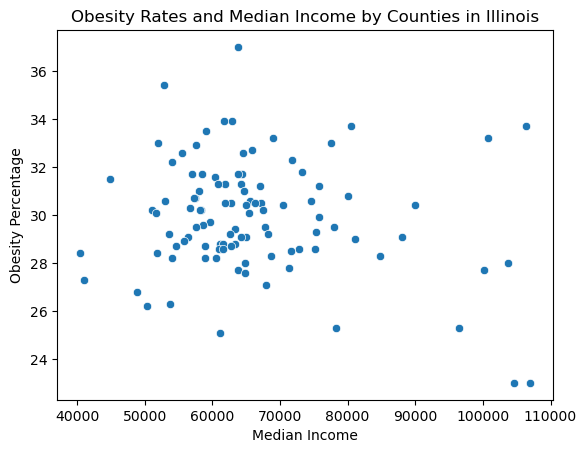

In [24]:
sns.scatterplot(data=obesity_income, x="Median Income", y="Obesity Percentage").set(title='Obesity Rates and Median Income by Counties in Illinois')
plt.show()

In [25]:
death_under65 = pd.read_csv('./data/under-65-d.csv')
death_under65.head()

,OBJECTID,County,Ages,Count
0,1,"Adams County, Illinois",Under 65 years old,1188
1,2,"Alexander County, Illinois",Under 65 years old,189
2,3,"Bond County, Illinois",Under 65 years old,346
3,4,"Boone County, Illinois",Under 65 years old,730
4,5,"Brown County, Illinois",Under 65 years old,84


In [26]:
death_under65['County']=death_under65['County'].str.replace(' County, Illinois', "")
death_under65.head()

,OBJECTID,County,Ages,Count
0,1,Adams,Under 65 years old,1188
1,2,Alexander,Under 65 years old,189
2,3,Bond,Under 65 years old,346
3,4,Boone,Under 65 years old,730
4,5,Brown,Under 65 years old,84


In [27]:
population= pd.read_csv('./data/population.csv')
population.head()

,geoid,name,B01003001,"B01003001, Error"
0,04000US17,Illinois,12757634,NaN
1,05000US17001,"Adams County, IL",65583,NaN
2,05000US17003,"Alexander County, IL",5261,NaN
3,05000US17005,"Bond County, IL",16750,NaN
4,05000US17007,"Boone County, IL",53459,NaN


In [28]:
population.columns= ['ID', 'County', 'Population', 'error']

In [29]:
population=population.drop(index=0)
population.head()

,ID,County,Population,error
1,05000US17001,"Adams County, IL",65583,NaN
2,05000US17003,"Alexander County, IL",5261,NaN
3,05000US17005,"Bond County, IL",16750,NaN
4,05000US17007,"Boone County, IL",53459,NaN
5,05000US17009,"Brown County, IL",6334,NaN


In [30]:
population['County']=population['County'].str.replace(' County, IL', "")
population.head()

,ID,County,Population,error
1,05000US17001,Adams,65583,NaN
2,05000US17003,Alexander,5261,NaN
3,05000US17005,Bond,16750,NaN
4,05000US17007,Boone,53459,NaN
5,05000US17009,Brown,6334,NaN


In [31]:
death_population=pd.merge(death_under65, population, on= 'County')
death_population.head()

,OBJECTID,County,Ages,Count,ID,Population,error
0,1,Adams,Under 65 years old,1188,05000US17001,65583,NaN
1,2,Alexander,Under 65 years old,189,05000US17003,5261,NaN
2,3,Bond,Under 65 years old,346,05000US17005,16750,NaN
3,4,Boone,Under 65 years old,730,05000US17007,53459,NaN
4,5,Brown,Under 65 years old,84,05000US17009,6334,NaN


In [32]:
death_population['Under 65 Death Rate']= death_population.Count/death_population.Population
death_population.head()

,OBJECTID,County,Ages,Count,ID,Population,error,Under 65 Death Rate
0,1,Adams,Under 65 years old,1188,05000US17001,65583,NaN,0.018114
1,2,Alexander,Under 65 years old,189,05000US17003,5261,NaN,0.035925
2,3,Bond,Under 65 years old,346,05000US17005,16750,NaN,0.020657
3,4,Boone,Under 65 years old,730,05000US17007,53459,NaN,0.013655
4,5,Brown,Under 65 years old,84,05000US17009,6334,NaN,0.013262


In [33]:
death_population=death_population.sort_values('Under 65 Death Rate', ascending= False)
death_population.head()

,OBJECTID,County,Ages,Count,ID,Population,error,Under 65 Death Rate
1,2,Alexander,Under 65 years old,189,05000US17003,5261,NaN,0.035925
70,77,Pulaski,Under 65 years old,173,05000US17153,5177,NaN,0.033417
32,35,Hardin,Under 65 years old,118,05000US17069,3665,NaN,0.032196
27,30,Gallatin,Under 65 years old,159,05000US17059,4967,NaN,0.032011
57,61,Massac,Under 65 years old,416,05000US17127,14135,NaN,0.029430


In [34]:
all_il=pd.merge(death_population, obesity_income, on= 'County')
all_il.head()

,OBJECTID,County,Ages,Count,ID,Population,error_x,Under 65 Death Rate,ID_x,Obesity Percentage,geometry,ID_y,Median Income,error_y
0,2,Alexander,Under 65 years old,189,05000US17003,5261,NaN,0.035925,62,28.4,"POLYGON ((649108.858 245208.619, 653530.711 24...",05000US17003,40365,8008
1,77,Pulaski,Under 65 years old,173,05000US17153,5177,NaN,0.033417,61,27.3,"POLYGON ((718117.349 244726.721, 718136.451 24...",05000US17153,41038,4450
2,35,Hardin,Under 65 years old,118,05000US17069,3665,NaN,0.032196,74,30.6,"POLYGON ((972068.865 339680.491, 977601.229 33...",05000US17069,53026,11006
3,30,Gallatin,Under 65 years old,159,05000US17059,4967,NaN,0.032011,70,28.4,"POLYGON ((972301.461 452109.444, 972301.180 45...",05000US17059,51868,5442
4,61,Massac,Under 65 years old,416,05000US17127,14135,NaN,0.029430,75,30.7,"POLYGON ((811060.295 232203.510, 811070.414 23...",05000US17127,57365,5415


In [35]:
all_il=all_il[['County', 'Ages', 'Count', 'Population', 'Under 65 Death Rate', 'Obesity Percentage', 'Median Income', 'geometry']]
all_il.head()

,County,Ages,Count,Population,Under 65 Death Rate,Obesity Percentage,Median Income,geometry
0,Alexander,Under 65 years old,189,5261,0.035925,28.4,40365,"POLYGON ((649108.858 245208.619, 653530.711 24..."
1,Pulaski,Under 65 years old,173,5177,0.033417,27.3,41038,"POLYGON ((718117.349 244726.721, 718136.451 24..."
2,Hardin,Under 65 years old,118,3665,0.032196,30.6,53026,"POLYGON ((972068.865 339680.491, 977601.229 33..."
3,Gallatin,Under 65 years old,159,4967,0.032011,28.4,51868,"POLYGON ((972301.461 452109.444, 972301.180 45..."
4,Massac,Under 65 years old,416,14135,0.029430,30.7,57365,"POLYGON ((811060.295 232203.510, 811070.414 23..."


In [36]:
all_il['Full County Name']=all_il.County+" County, Illinois"
all_il.head()

,County,Ages,Count,Population,Under 65 Death Rate,Obesity Percentage,Median Income,geometry,Full County Name
0,Alexander,Under 65 years old,189,5261,0.035925,28.4,40365,"POLYGON ((649108.858 245208.619, 653530.711 24...","Alexander County, Illinois"
1,Pulaski,Under 65 years old,173,5177,0.033417,27.3,41038,"POLYGON ((718117.349 244726.721, 718136.451 24...","Pulaski County, Illinois"
2,Hardin,Under 65 years old,118,3665,0.032196,30.6,53026,"POLYGON ((972068.865 339680.491, 977601.229 33...","Hardin County, Illinois"
3,Gallatin,Under 65 years old,159,4967,0.032011,28.4,51868,"POLYGON ((972301.461 452109.444, 972301.180 45...","Gallatin County, Illinois"
4,Massac,Under 65 years old,416,14135,0.029430,30.7,57365,"POLYGON ((811060.295 232203.510, 811070.414 23...","Massac County, Illinois"


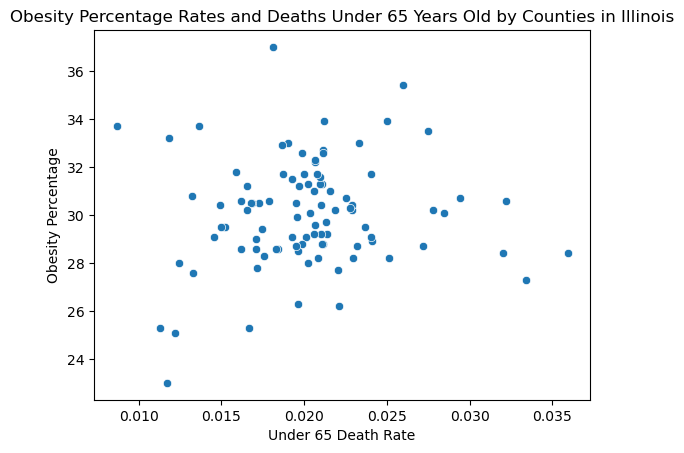

In [37]:
sns.scatterplot(data=all_il, x="Under 65 Death Rate", y="Obesity Percentage").set(title='Obesity Percentage Rates and Deaths Under 65 Years Old by Counties in Illinois')
plt.show()

In [38]:
all_il.to_csv('./outfiles/all_il.csv', index=False)

In [39]:
fertility= pd.read_csv('./data/fertility.csv')
fertility.head()

,geoid,name,B13016001,"B13016001, Error",B13016002,"B13016002, Error",B13016003,"B13016003, Error",B13016004,"B13016004, Error",...,B13016013,"B13016013, Error",B13016014,"B13016014, Error",B13016015,"B13016015, Error",B13016016,"B13016016, Error",B13016017,"B13016017, Error"
0,01000US,United States,77210490,10509,3982404,23722,102904,3282,599156,7319,...,10063929,9021,10007395,14211,10145009,23165,10069758,23036,12121216,11059
1,04000US17,Illinois,2994448,2120,152825,3352,2948,458,20127,1062,...,392261,1707,378265,1651,394920,4173,393249,3975,475603,2280
2,05000US17001,"Adams County, IL",13785,209,756,212,0,29,261,145,...,1708,152,1711,125,1650,250,2218,248,2244,118
3,05000US17003,"Alexander County, IL",954,67,38,25,0,17,26,25,...,127,41,80,15,53,38,228,76,158,34
4,05000US17005,"Bond County, IL",3568,97,133,59,0,19,46,47,...,363,35,421,39,491,102,500,137,495,70


In [114]:
race= pd.read_csv('./data/race.csv')
race.head()

,geoid,name,B01001001,White,Black/African American,American Indian/Alaskan Native,Asian Alone,Native Hawaiian/Pacific Islander,Some Other Race Alone,Two or More Races,Percentage of White Only,Percentage of Black/African American Only,Percentage of American Indian/Alaskan Native Only,Percentage of Asian Only,Percentage of Native Hawaiian/Pacific Islander,Percentage of Some Other Race Alone,Percentage of Two or More Races
0,04000US17,Illinois,12757634,8388659,1774605,55819,738071,5476,842553,952451,66%,0.14,0%,0.06,0%,7%,0.07
1,05000US17001,"Adams County, IL",65583,59980,2578,40,487,9,239,2250,91%,0.04,0%,0.01,0%,0%,0.03
2,05000US17003,"Alexander County, IL",5261,3340,1748,0,13,16,0,144,63%,0.33,0%,0.00,0%,0%,0.03
3,05000US17005,"Bond County, IL",16750,14858,1195,136,77,0,55,429,89%,0.07,1%,0.00,0%,0%,0.03
4,05000US17007,"Boone County, IL",53459,42419,1384,144,502,0,4690,4320,79%,0.03,0%,0.01,0%,9%,0.08


In [115]:
race.columns= ['ID', 'County', 'Population','White Only', 'Black/African American Only', 'American Indian/Alaskan Native Only', 'Asian Only', 'Native Hawaiian/Pacific Islander Only', 'Some Other Race', 'Two or More Races','Percentage of White Only', 'Percentage of Black/African American Only', 'Percentage of American Indian/Alaskan Native Only', 'Percentage of Asian Only','Percentage of Native Hawaiian/Pacific Islander','Percentage of Some Other Race Alone','Percentage of Two or More Races']

In [116]:
race=race.drop(index=0)
race.head()

,ID,County,Population,White Only,Black/African American Only,American Indian/Alaskan Native Only,Asian Only,Native Hawaiian/Pacific Islander Only,Some Other Race,Two or More Races,Percentage of White Only,Percentage of Black/African American Only,Percentage of American Indian/Alaskan Native Only,Percentage of Asian Only,Percentage of Native Hawaiian/Pacific Islander,Percentage of Some Other Race Alone,Percentage of Two or More Races
1,05000US17001,"Adams County, IL",65583,59980,2578,40,487,9,239,2250,91%,0.04,0%,0.01,0%,0%,0.03
2,05000US17003,"Alexander County, IL",5261,3340,1748,0,13,16,0,144,63%,0.33,0%,0.00,0%,0%,0.03
3,05000US17005,"Bond County, IL",16750,14858,1195,136,77,0,55,429,89%,0.07,1%,0.00,0%,0%,0.03
4,05000US17007,"Boone County, IL",53459,42419,1384,144,502,0,4690,4320,79%,0.03,0%,0.01,0%,9%,0.08
5,05000US17009,"Brown County, IL",6334,4956,1053,32,3,0,156,134,78%,0.17,1%,0.00,0%,2%,0.02


In [117]:
race['County']=race['County'].str.replace(' County, IL', "")
race.head()

,ID,County,Population,White Only,Black/African American Only,American Indian/Alaskan Native Only,Asian Only,Native Hawaiian/Pacific Islander Only,Some Other Race,Two or More Races,Percentage of White Only,Percentage of Black/African American Only,Percentage of American Indian/Alaskan Native Only,Percentage of Asian Only,Percentage of Native Hawaiian/Pacific Islander,Percentage of Some Other Race Alone,Percentage of Two or More Races
1,05000US17001,Adams,65583,59980,2578,40,487,9,239,2250,91%,0.04,0%,0.01,0%,0%,0.03
2,05000US17003,Alexander,5261,3340,1748,0,13,16,0,144,63%,0.33,0%,0.00,0%,0%,0.03
3,05000US17005,Bond,16750,14858,1195,136,77,0,55,429,89%,0.07,1%,0.00,0%,0%,0.03
4,05000US17007,Boone,53459,42419,1384,144,502,0,4690,4320,79%,0.03,0%,0.01,0%,9%,0.08
5,05000US17009,Brown,6334,4956,1053,32,3,0,156,134,78%,0.17,1%,0.00,0%,2%,0.02


In [118]:
sex= pd.read_csv('./data/sex.csv')
sex.head()

,geoid,name,B01001001,Male,Female,Percent Male,Percent Female
0,04000US17,Illinois,12757634,6313019,6444615,NaN,NaN
1,05000US17001,"Adams County, IL",65583,32311,33272,49%,51%
2,05000US17003,"Alexander County, IL",5261,2561,2700,49%,51%
3,05000US17005,"Bond County, IL",16750,8893,7857,53%,47%
4,05000US17007,"Boone County, IL",53459,26938,26521,50%,50%


In [119]:
sex=sex.drop(index=0)
sex.head()

,geoid,name,B01001001,Male,Female,Percent Male,Percent Female
1,05000US17001,"Adams County, IL",65583,32311,33272,49%,51%
2,05000US17003,"Alexander County, IL",5261,2561,2700,49%,51%
3,05000US17005,"Bond County, IL",16750,8893,7857,53%,47%
4,05000US17007,"Boone County, IL",53459,26938,26521,50%,50%
5,05000US17009,"Brown County, IL",6334,3992,2342,63%,37%


In [120]:
sex.columns= ['ID', 'County', 'Total Population', 'Count of Males', 'Count of Females', 'Percent Male', 'Percent Female']

In [121]:
sex['County']=sex['County'].str.replace(' County, IL', "")
sex.head()

,ID,County,Total Population,Count of Males,Count of Females,Percent Male,Percent Female
1,05000US17001,Adams,65583,32311,33272,49%,51%
2,05000US17003,Alexander,5261,2561,2700,49%,51%
3,05000US17005,Bond,16750,8893,7857,53%,47%
4,05000US17007,Boone,53459,26938,26521,50%,50%
5,05000US17009,Brown,6334,3992,2342,63%,37%


In [122]:
race_sex=pd.merge(race, sex, on= 'County')
race_sex.head()

,ID_x,County,Population,White Only,Black/African American Only,American Indian/Alaskan Native Only,Asian Only,Native Hawaiian/Pacific Islander Only,Some Other Race,Two or More Races,...,Percentage of Asian Only,Percentage of Native Hawaiian/Pacific Islander,Percentage of Some Other Race Alone,Percentage of Two or More Races,ID_y,Total Population,Count of Males,Count of Females,Percent Male,Percent Female
0,05000US17001,Adams,65583,59980,2578,40,487,9,239,2250,...,0.01,0%,0%,0.03,05000US17001,65583,32311,33272,49%,51%
1,05000US17003,Alexander,5261,3340,1748,0,13,16,0,144,...,0.00,0%,0%,0.03,05000US17003,5261,2561,2700,49%,51%
2,05000US17005,Bond,16750,14858,1195,136,77,0,55,429,...,0.00,0%,0%,0.03,05000US17005,16750,8893,7857,53%,47%
3,05000US17007,Boone,53459,42419,1384,144,502,0,4690,4320,...,0.01,0%,9%,0.08,05000US17007,53459,26938,26521,50%,50%
4,05000US17009,Brown,6334,4956,1053,32,3,0,156,134,...,0.00,0%,2%,0.02,05000US17009,6334,3992,2342,63%,37%


In [123]:
all_il_1=pd.merge(race_sex, all_il, on= 'County')
all_il_1.head()

,ID_x,County,Population_x,White Only,Black/African American Only,American Indian/Alaskan Native Only,Asian Only,Native Hawaiian/Pacific Islander Only,Some Other Race,Two or More Races,...,Percent Male,Percent Female,Ages,Count,Population_y,Under 65 Death Rate,Obesity Percentage,Median Income,geometry,Full County Name
0,05000US17001,Adams,65583,59980,2578,40,487,9,239,2250,...,49%,51%,Under 65 years old,1188,65583,0.018114,37.0,63767,"POLYGON ((98117.828 1302709.290, 101888.882 13...","Adams County, Illinois"
1,05000US17003,Alexander,5261,3340,1748,0,13,16,0,144,...,49%,51%,Under 65 years old,189,5261,0.035925,28.4,40365,"POLYGON ((649108.858 245208.619, 653530.711 24...","Alexander County, Illinois"
2,05000US17005,Bond,16750,14858,1195,136,77,0,55,429,...,53%,47%,Under 65 years old,346,16750,0.020657,29.6,58617,"POLYGON ((723760.850 861253.621, 723711.636 85...","Bond County, Illinois"
3,05000US17007,Boone,53459,42419,1384,144,502,0,4690,4320,...,50%,50%,Under 65 years old,730,53459,0.013655,33.7,80502,"POLYGON ((883358.271 2122657.886, 883362.596 2...","Boone County, Illinois"
4,05000US17009,Brown,6334,4956,1053,32,3,0,156,134,...,63%,37%,Under 65 years old,84,6334,0.013262,27.6,64760,"POLYGON ((342455.856 1231661.823, 342466.456 1...","Brown County, Illinois"


In [50]:
all_il_1.to_csv('./outfiles/all_il_1.csv', index=False)

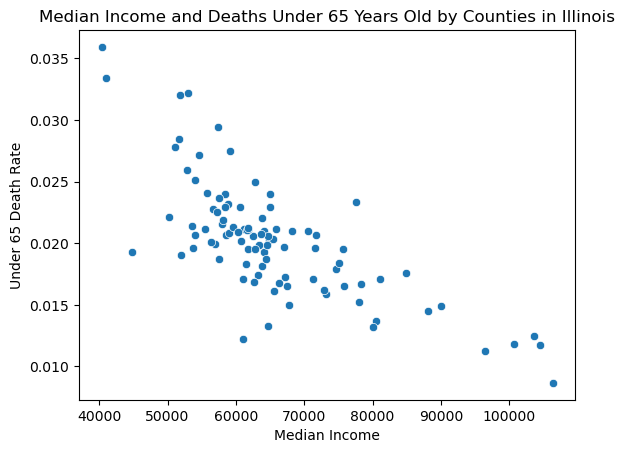

In [51]:
sns.scatterplot(data=all_il_1, x="Median Income", y="Under 65 Death Rate").set(title='Median Income and Deaths Under 65 Years Old by Counties in Illinois')
plt.show()

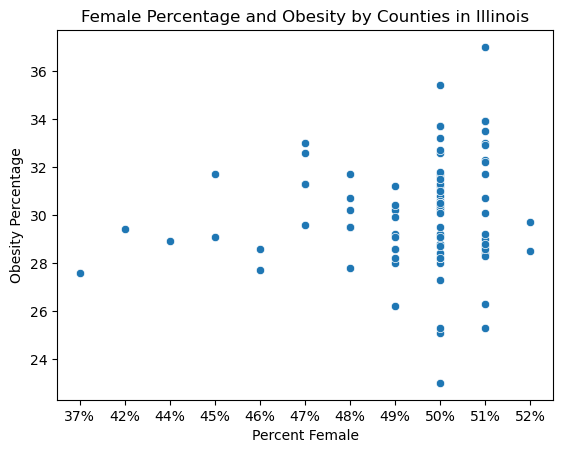

In [92]:
sns.scatterplot(data=all_il_1.sort_values('Percent Female',ascending= True), x="Percent Female", y="Obesity Percentage").set(title='Female Percentage and Obesity by Counties in Illinois')
plt.show()

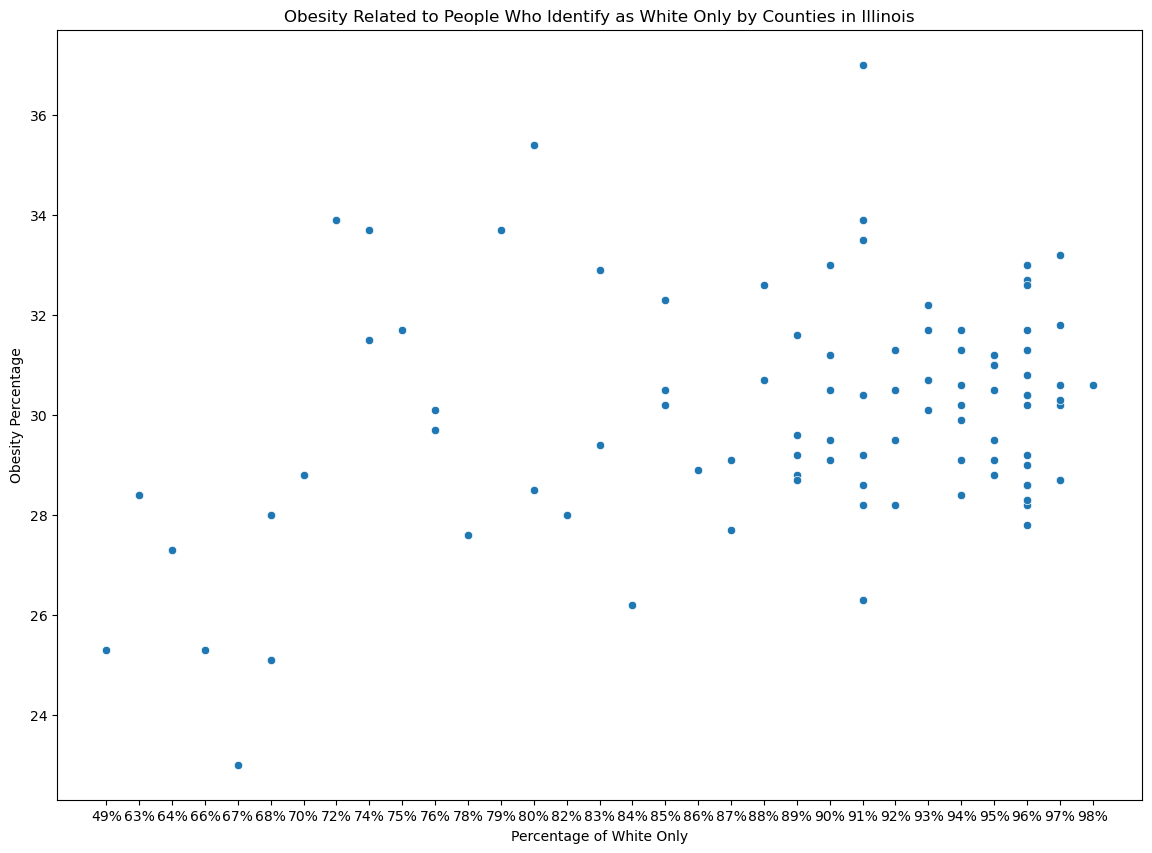

In [82]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of White Only',ascending= True), x="Percentage of White Only", y="Obesity Percentage").set(title='Obesity Related to People Who Identify as White Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

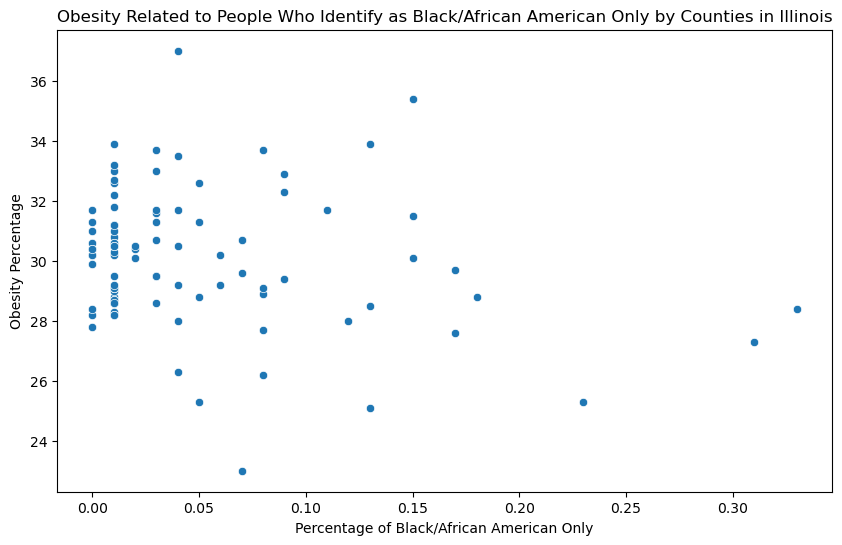

In [124]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Black/African American Only',ascending= True), x="Percentage of Black/African American Only", y="Obesity Percentage").set(title='Obesity Related to People Who Identify as Black/African American Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

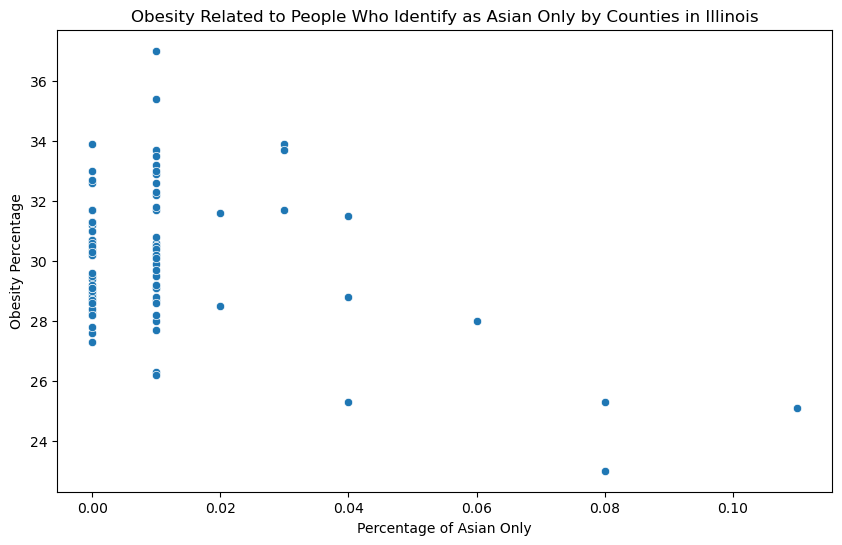

In [125]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Asian Only',ascending= True), x="Percentage of Asian Only", y="Obesity Percentage").set(title='Obesity Related to People Who Identify as Asian Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

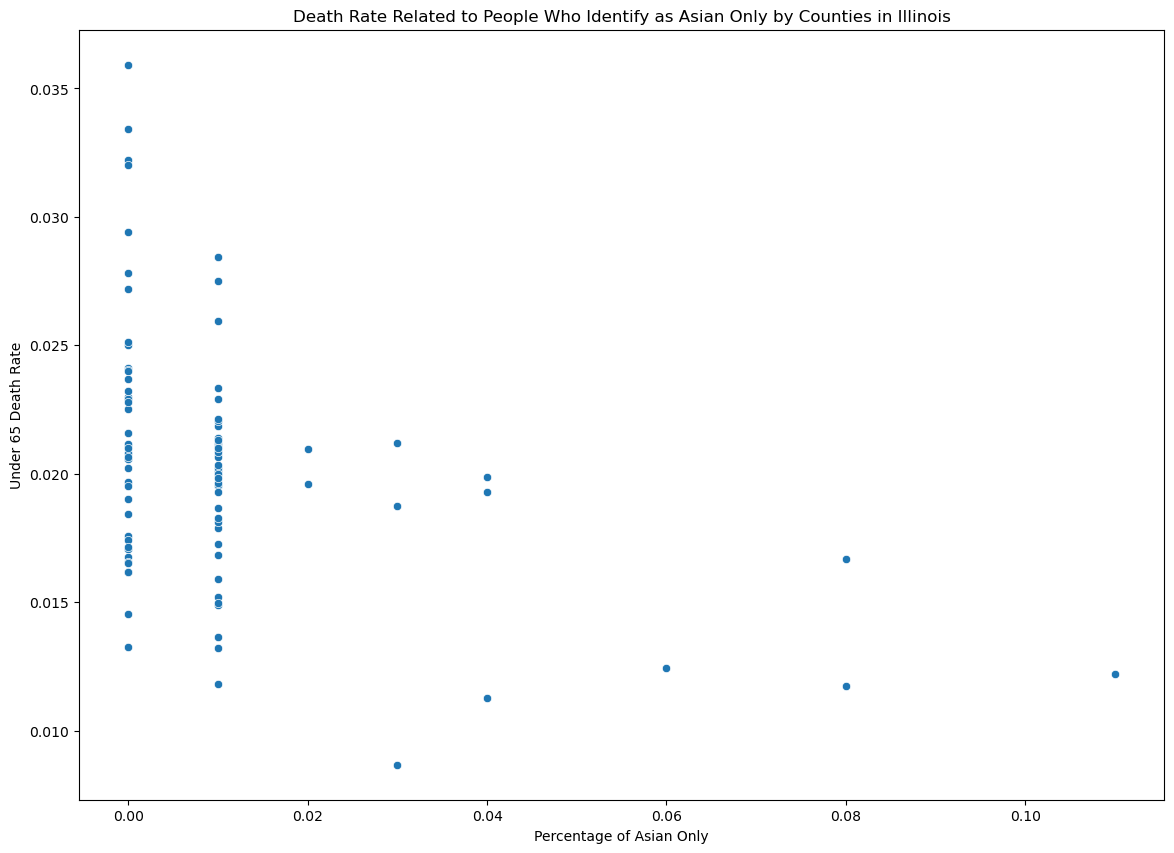

In [133]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Asian Only',ascending= True), x="Percentage of Asian Only", y="Under 65 Death Rate").set(title='Death Rate Related to People Who Identify as Asian Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

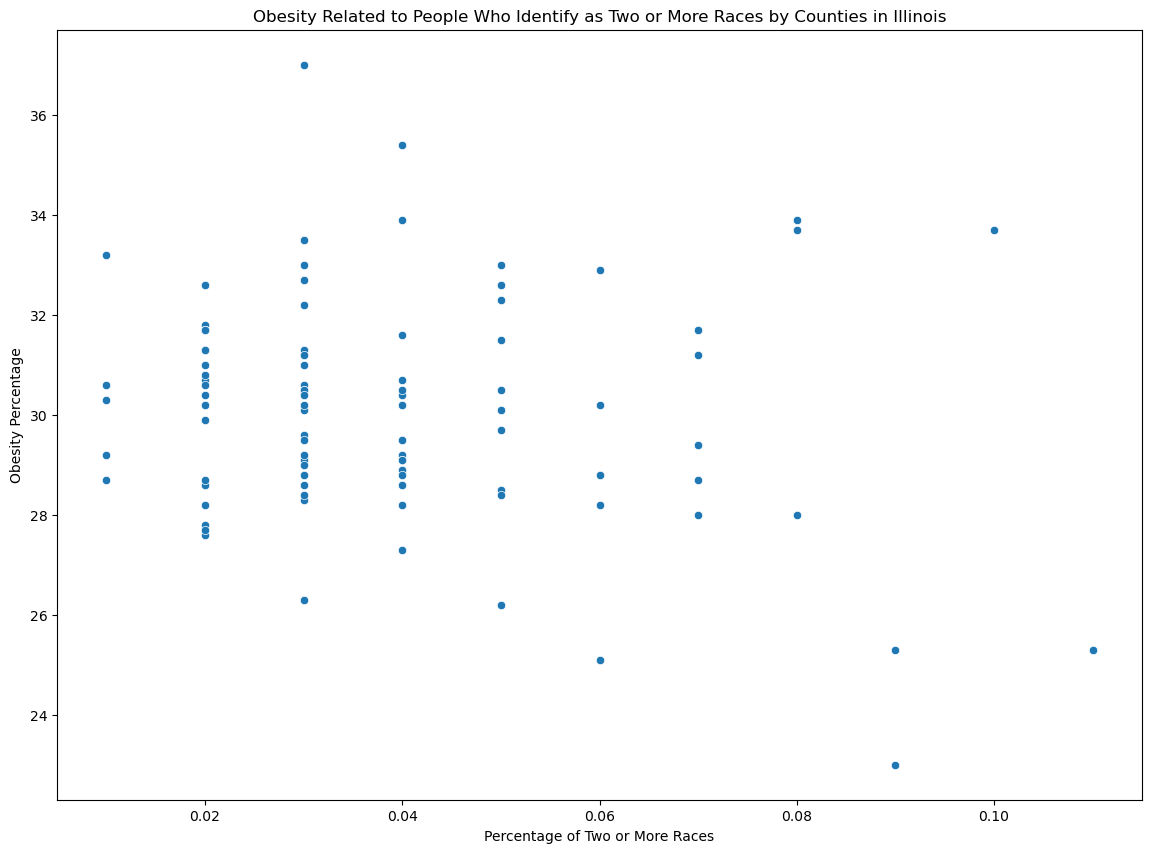

In [126]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Two or More Races',ascending= True), x="Percentage of Two or More Races", y="Obesity Percentage").set(title='Obesity Related to People Who Identify as Two or More Races by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

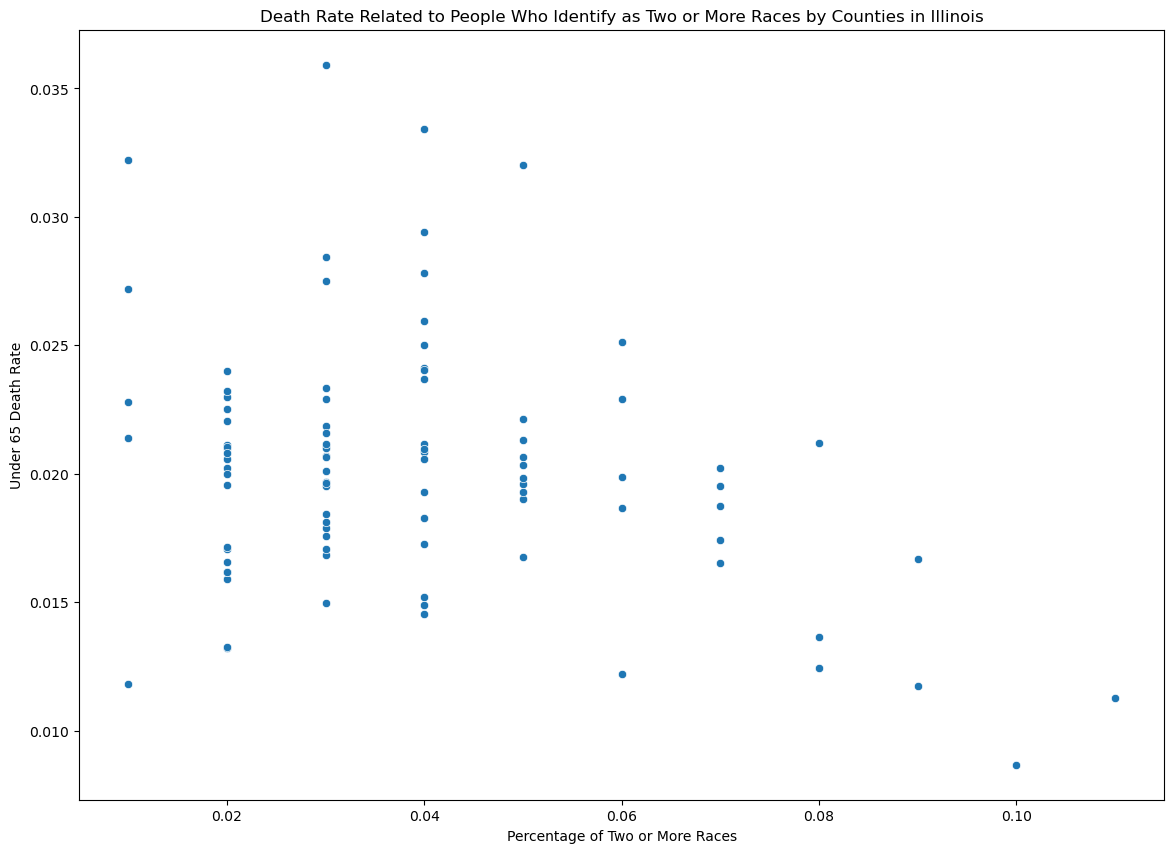

In [132]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Two or More Races',ascending= True), x="Percentage of Two or More Races", y="Under 65 Death Rate").set(title='Death Rate Related to People Who Identify as Two or More Races by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

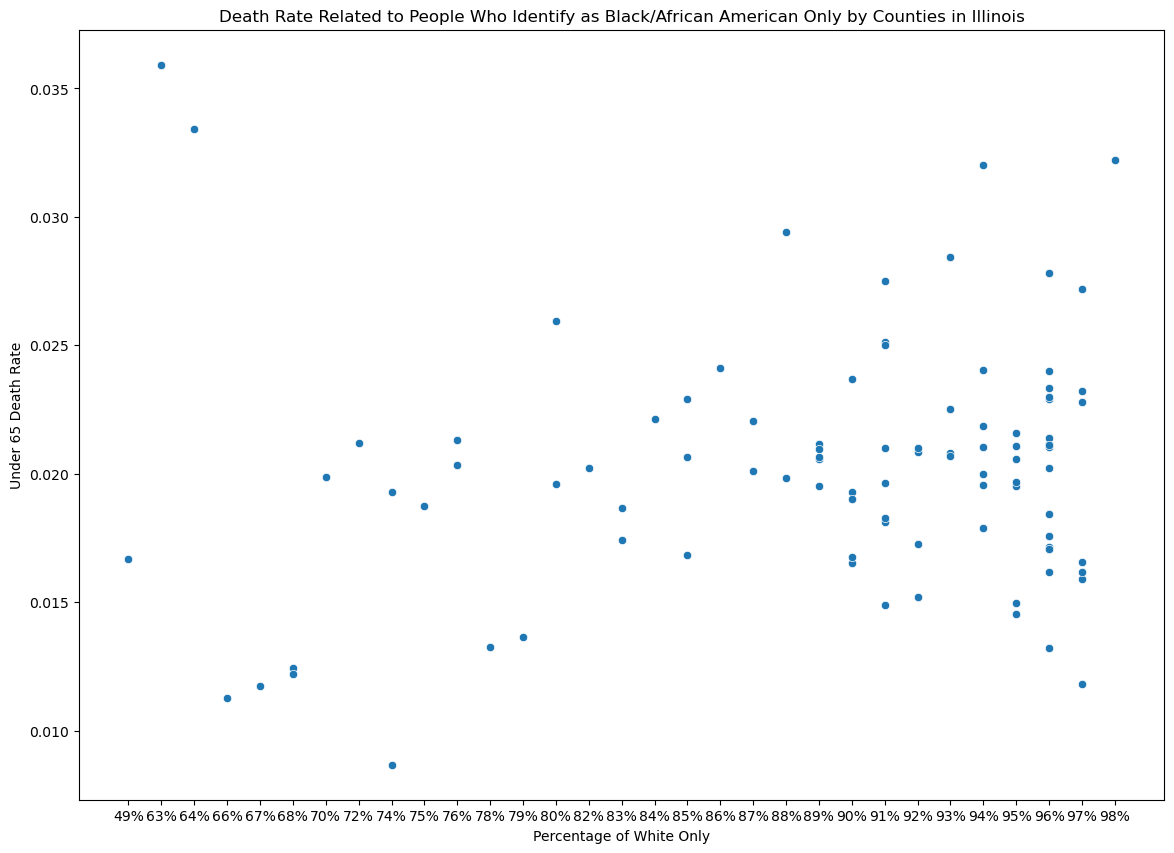

In [130]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of White Only',ascending= True), x="Percentage of White Only", y="Under 65 Death Rate").set(title='Death Rate Related to People Who Identify as White Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

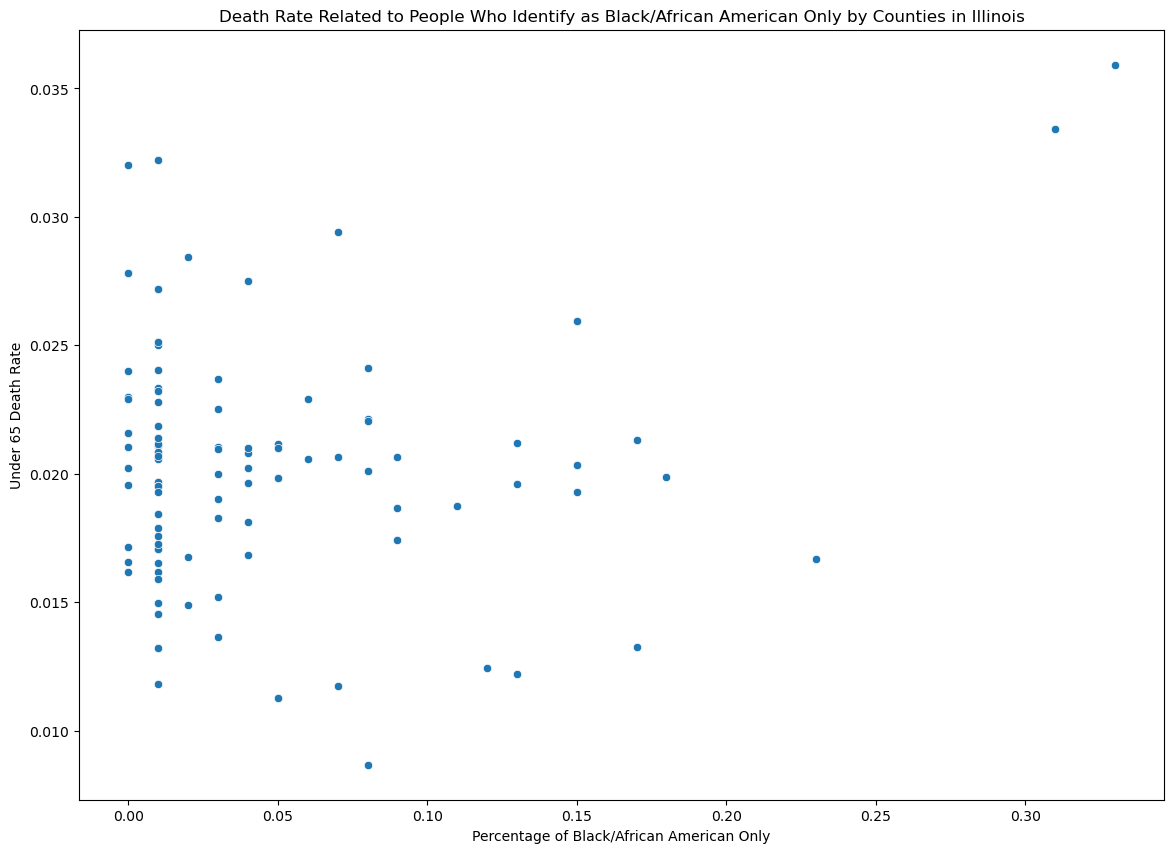

In [128]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Black/African American Only',ascending= True), x="Percentage of Black/African American Only", y="Under 65 Death Rate").set(title='Death Rate Related to People Who Identify as Black/African American Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

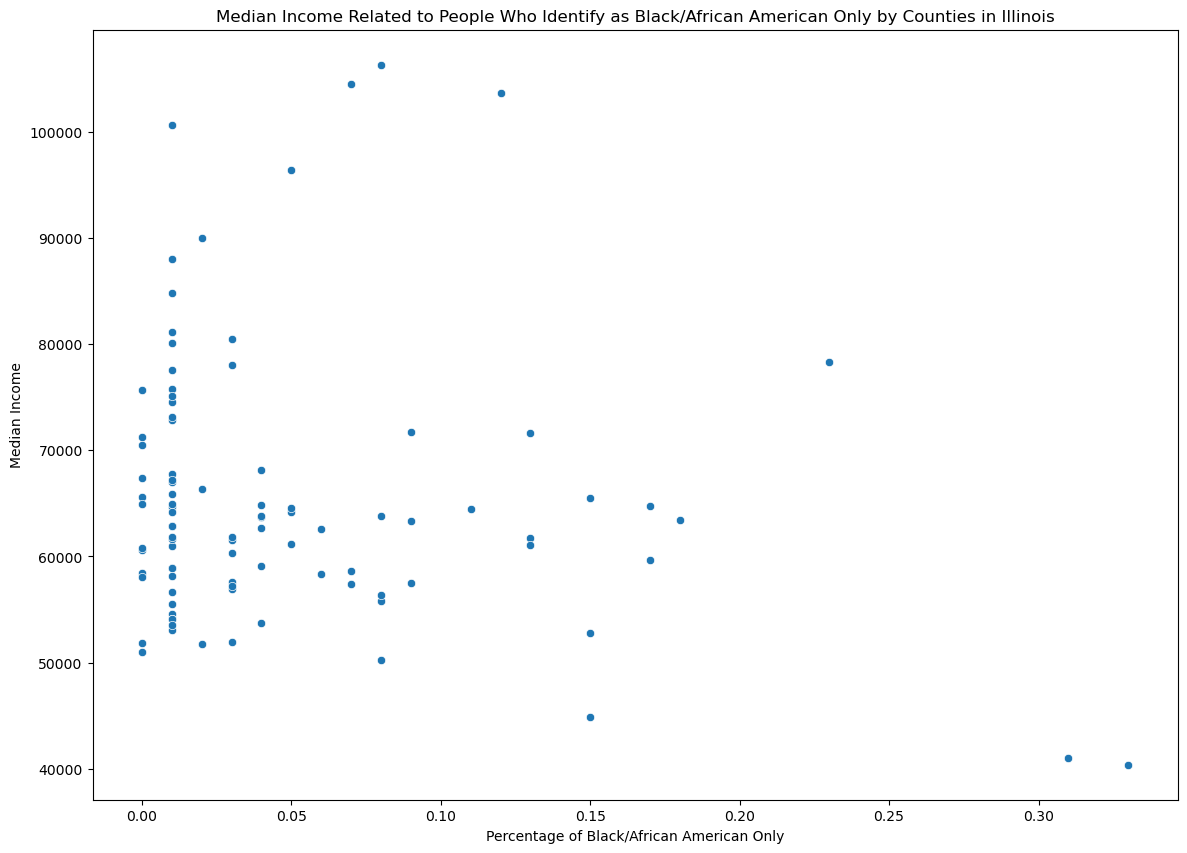

In [137]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Black/African American Only',ascending= True), x="Percentage of Black/African American Only", y="Median Income").set(title='Median Income Related to People Who Identify as Black/African American Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

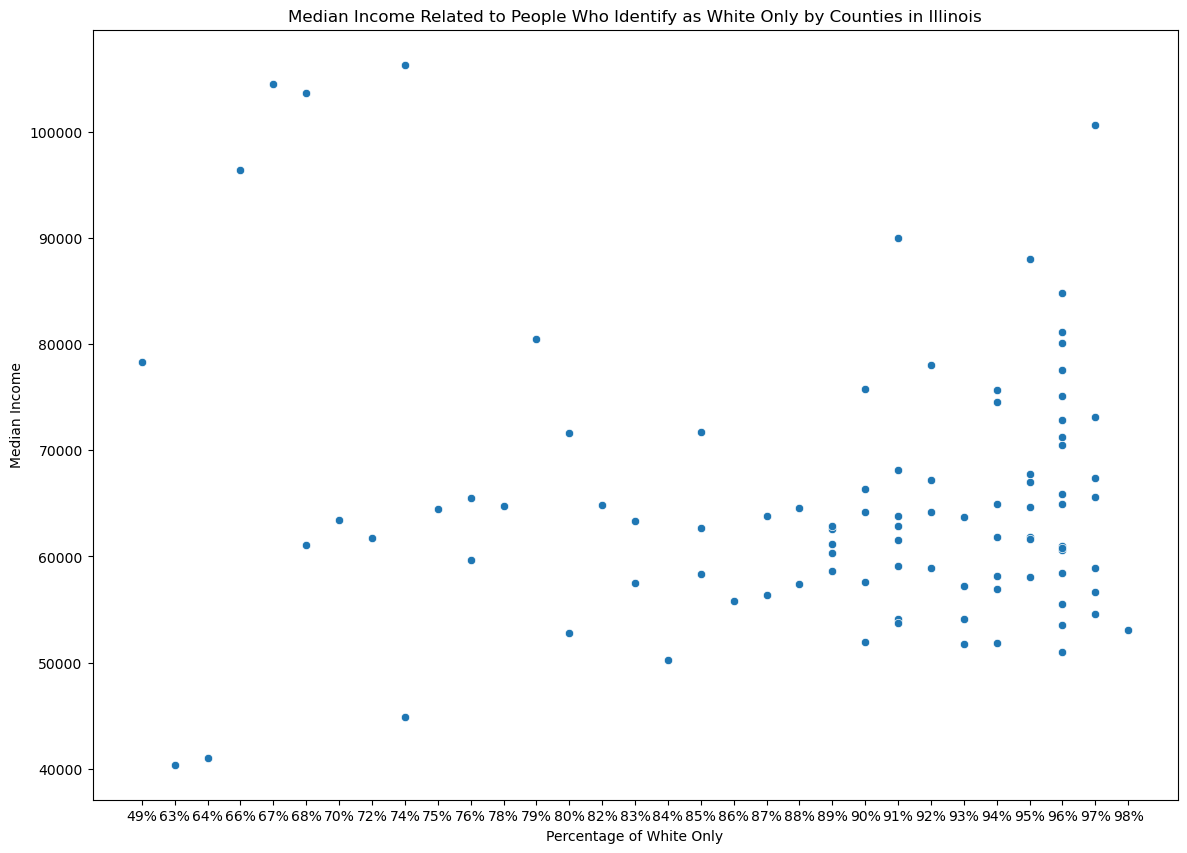

In [138]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of White Only',ascending= True), x="Percentage of White Only", y="Median Income").set(title='Median Income Related to People Who Identify as White Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

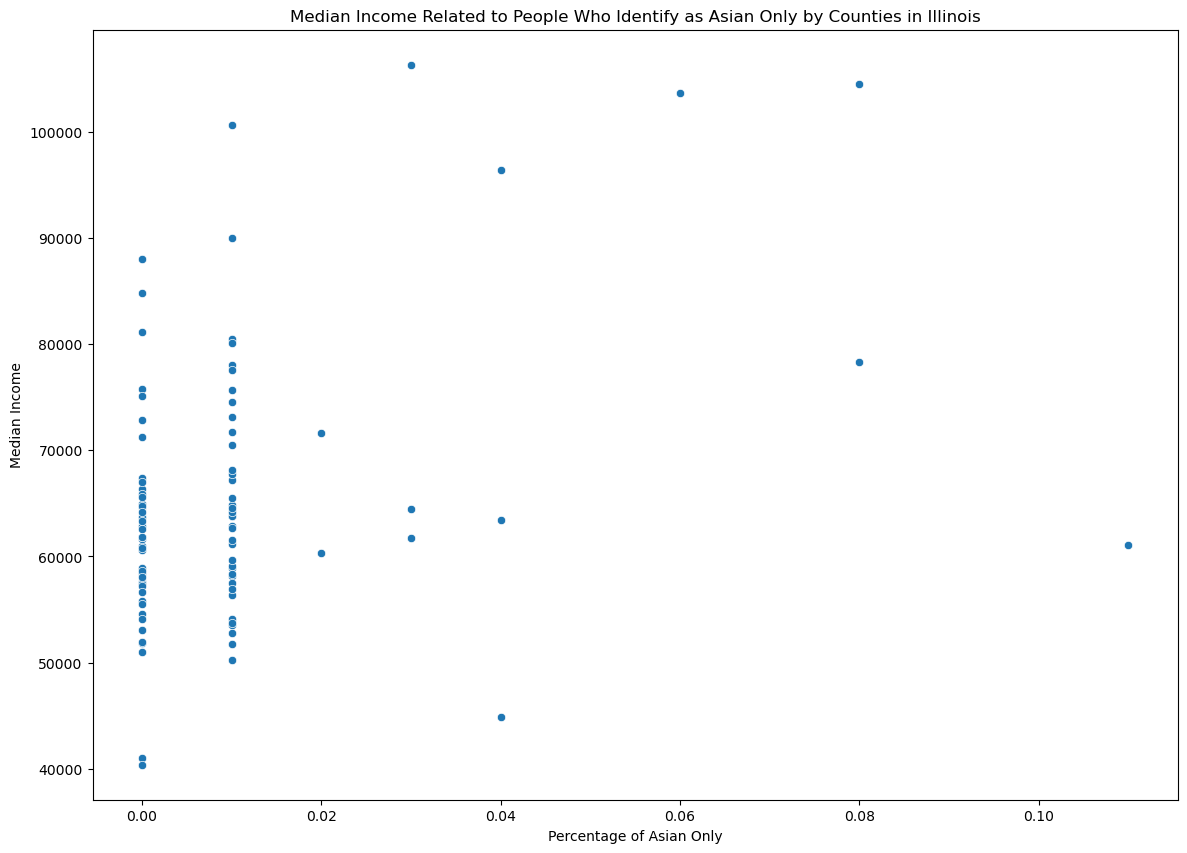

In [139]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Asian Only',ascending= True), x="Percentage of Asian Only", y="Median Income").set(title='Median Income Related to People Who Identify as Asian Only by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

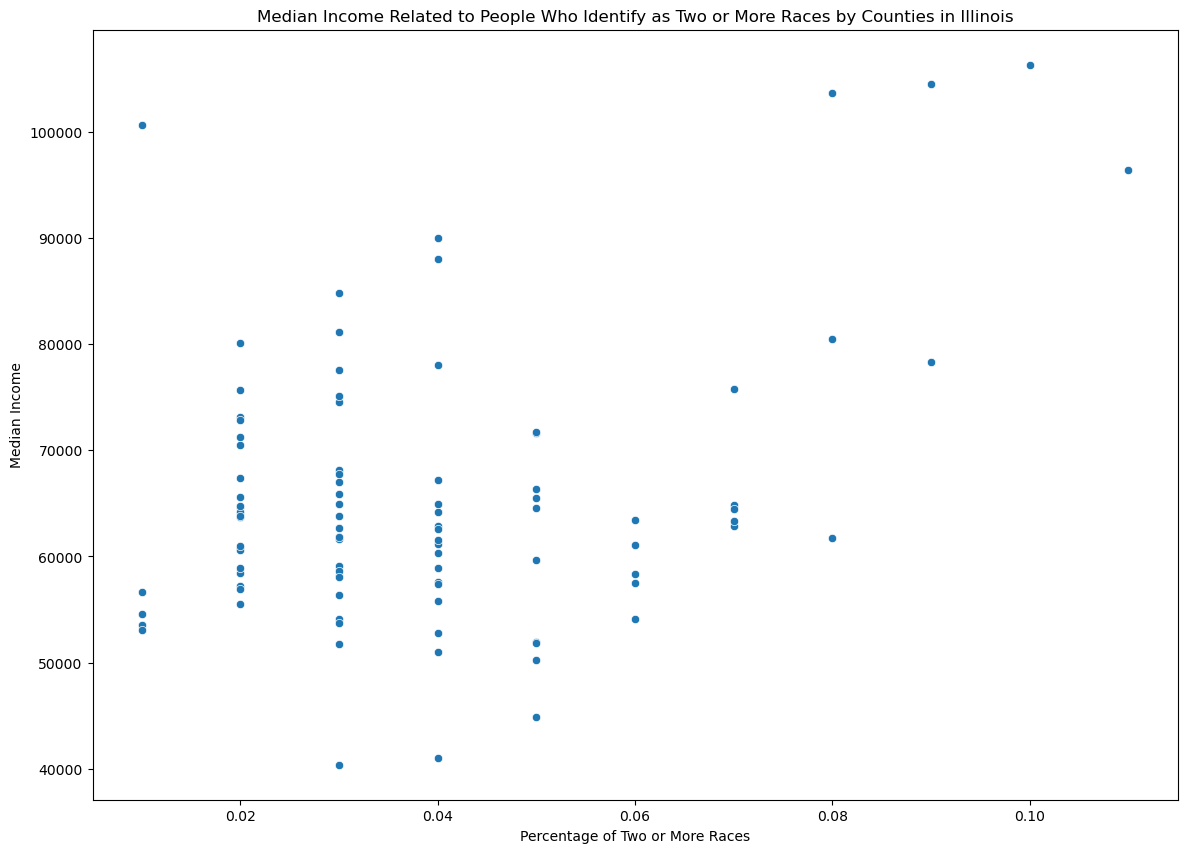

In [140]:
plt.figure(figsize=(14,10))
sns.scatterplot(data=all_il_1.sort_values('Percentage of Two or More Races',ascending= True), x="Percentage of Two or More Races", y="Median Income").set(title='Median Income Related to People Who Identify as Two or More Races by Counties in Illinois')
plt.xticks(fontsize=10)
plt.show()

In [75]:
all_il_1.columns

Index(['ID_x', 'County', 'Population_x', 'White Only',
       'Black/African American Only', 'American Indian/Alaskan Native Only',
       'Asian Only', 'Native Hawaiian/Pacific Islander Only',
       'Some Other Race', 'Two or More Races', 'Percentage of White Only',
       'Percentage of Black/African American Only',
       'Percentage of American Indian/Alaskan Native Only',
       'Percentage of Asian Only',
       'Percentage of Native Hawaiian/Pacific Islander',
       'Percentage of Some Other Race Alone',
       'Percentage of Two or More Races', 'ID_y', 'Total Population',
       'Count of Males', 'Count of Females', 'Percent Male', 'Percent Female',
       'Ages', 'Count', 'Population_y', 'Under 65 Death Rate',
       'Obesity Percentage', 'Median Income', 'geometry', 'Full County Name'],
      dtype='object')

In [53]:
obesperc= pd.read_csv('./data/obesity-percentages.csv')
obesperc.head()

,OBJECTID,County,Percentage,Percent_1
0,1,McHenry County,28%,27.7
1,2,Boone County,34%,33.7
2,3,Ogle County,31%,31.2
3,4,Will County,28%,28.0
4,5,LaSalle County,27%,27.1


In [61]:
obesperc.columns= ['ID', 'County', 'Obesity Percentage','NA']
obesperc.head()

,ID,County,Obesity Percentage,NA
0,1,McHenry County,28%,27.7
1,2,Boone County,34%,33.7
2,3,Ogle County,31%,31.2
3,4,Will County,28%,28.0
4,5,LaSalle County,27%,27.1


In [62]:
obesperc['County']=obesperc['County'].str.replace(' County', "")
obesperc.head()

,ID,County,Obesity Percentage,NA
0,1,McHenry,28%,27.7
1,2,Boone,34%,33.7
2,3,Ogle,31%,31.2
3,4,Will,28%,28.0
4,5,LaSalle,27%,27.1


In [67]:
obesperc=obesperc.sort_values('Obesity Percentage', ascending= False)

In [63]:
all_il_2=pd.merge(obesperc, all_il_1, on= 'County')
all_il_2.head()

,ID,County,Obesity Percentage_x,NA,ID_x,Population_x,White Only,Black/African American Only,American Indian/Alaskan Native Only,Asian Only,...,Percent Male,Percent Female,Ages,Count,Population_y,Under 65 Death Rate,Obesity Percentage_y,Median Income,geometry,Full County Name
0,2,Boone,34%,33.7,05000US17007,53459,42419,1384,144,502,...,50%,50%,Under 65 years old,730,53459,0.013655,33.7,80502,"POLYGON ((883358.271 2122657.886, 883362.596 2...","Boone County, Illinois"
1,3,Ogle,31%,31.2,05000US17141,51672,46277,556,204,252,...,50%,50%,Under 65 years old,854,51672,0.016527,31.2,75782,"POLYGON ((617161.942 2018203.086, 622481.577 2...","Ogle County, Illinois"
2,4,Will,28%,28.0,05000US17197,696774,472488,80419,3034,41205,...,50%,50%,Under 65 years old,8668,696774,0.012440,28.0,103678,"POLYGON ((1003871.064 1842165.938, 1003869.036...","Will County, Illinois"
3,6,Bureau,29%,29.1,05000US17011,33203,30017,204,20,305,...,50%,50%,Under 65 years old,640,33203,0.019275,29.1,64165,"POLYGON ((629092.355 1794004.293, 629912.029 1...","Bureau County, Illinois"
4,7,Henry,31%,30.5,05000US17073,49157,44291,1079,11,229,...,50%,50%,Under 65 years old,824,49157,0.016763,30.5,66313,"POLYGON ((565904.614 1794708.806, 566049.494 1...","Henry County, Illinois"


In [64]:
all_il_2.to_csv('./outfiles/all_il_2.csv', index=False)

In [65]:
top_10.to_csv('./outfiles/top_10.csv', index=False)

In [66]:
bottom_10.to_csv('./outfiles/bottom_10.csv', index=False)

In [ ]:
plt.figure(figsize=(14,10))
sns.barplot(x = 'County',y = 'Obesity Percentage',data = obesity)
plt.xlabel("County")
plt.ylabel("Obesity Percentage")
plt.title('Obesity Percentage Rate by County')
plt.xticks(rotation=90)
plt.show()

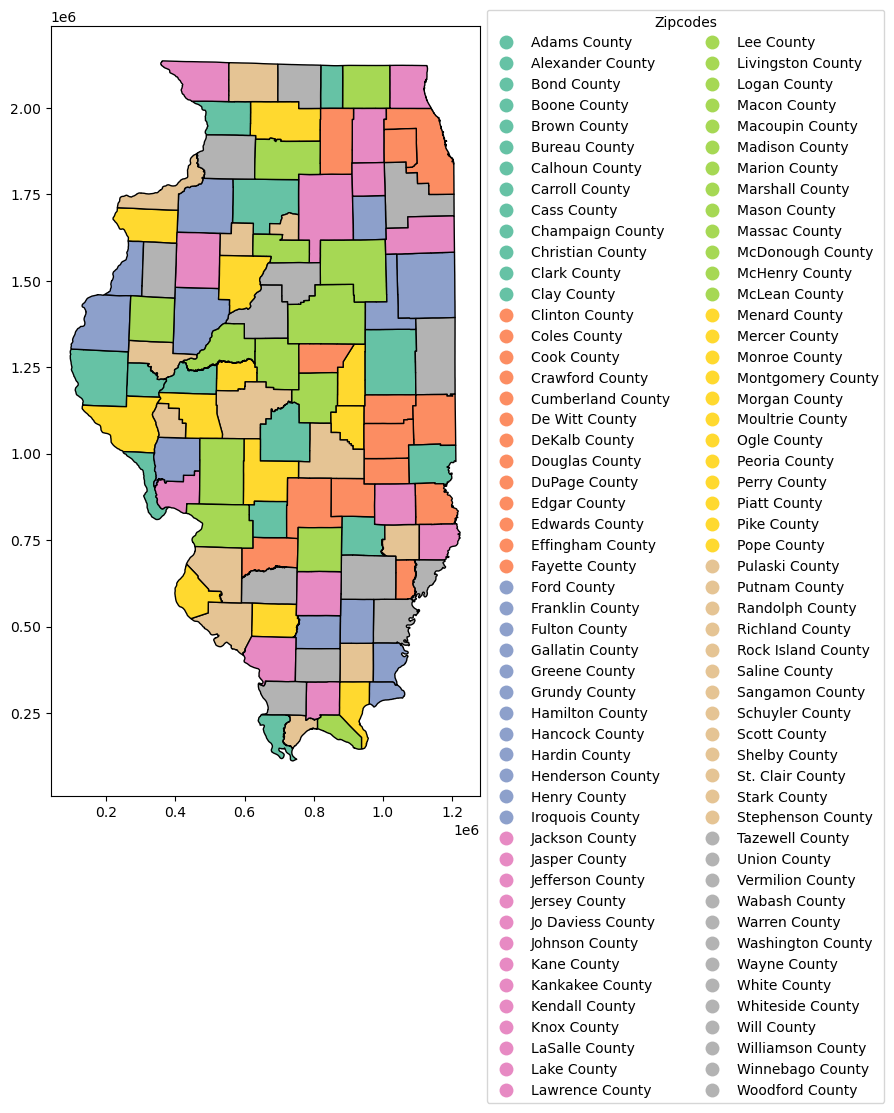

In [ ]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'County', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()